Mouse position: (1851, 86)
total 0.08402657508850098
[1851, 86]


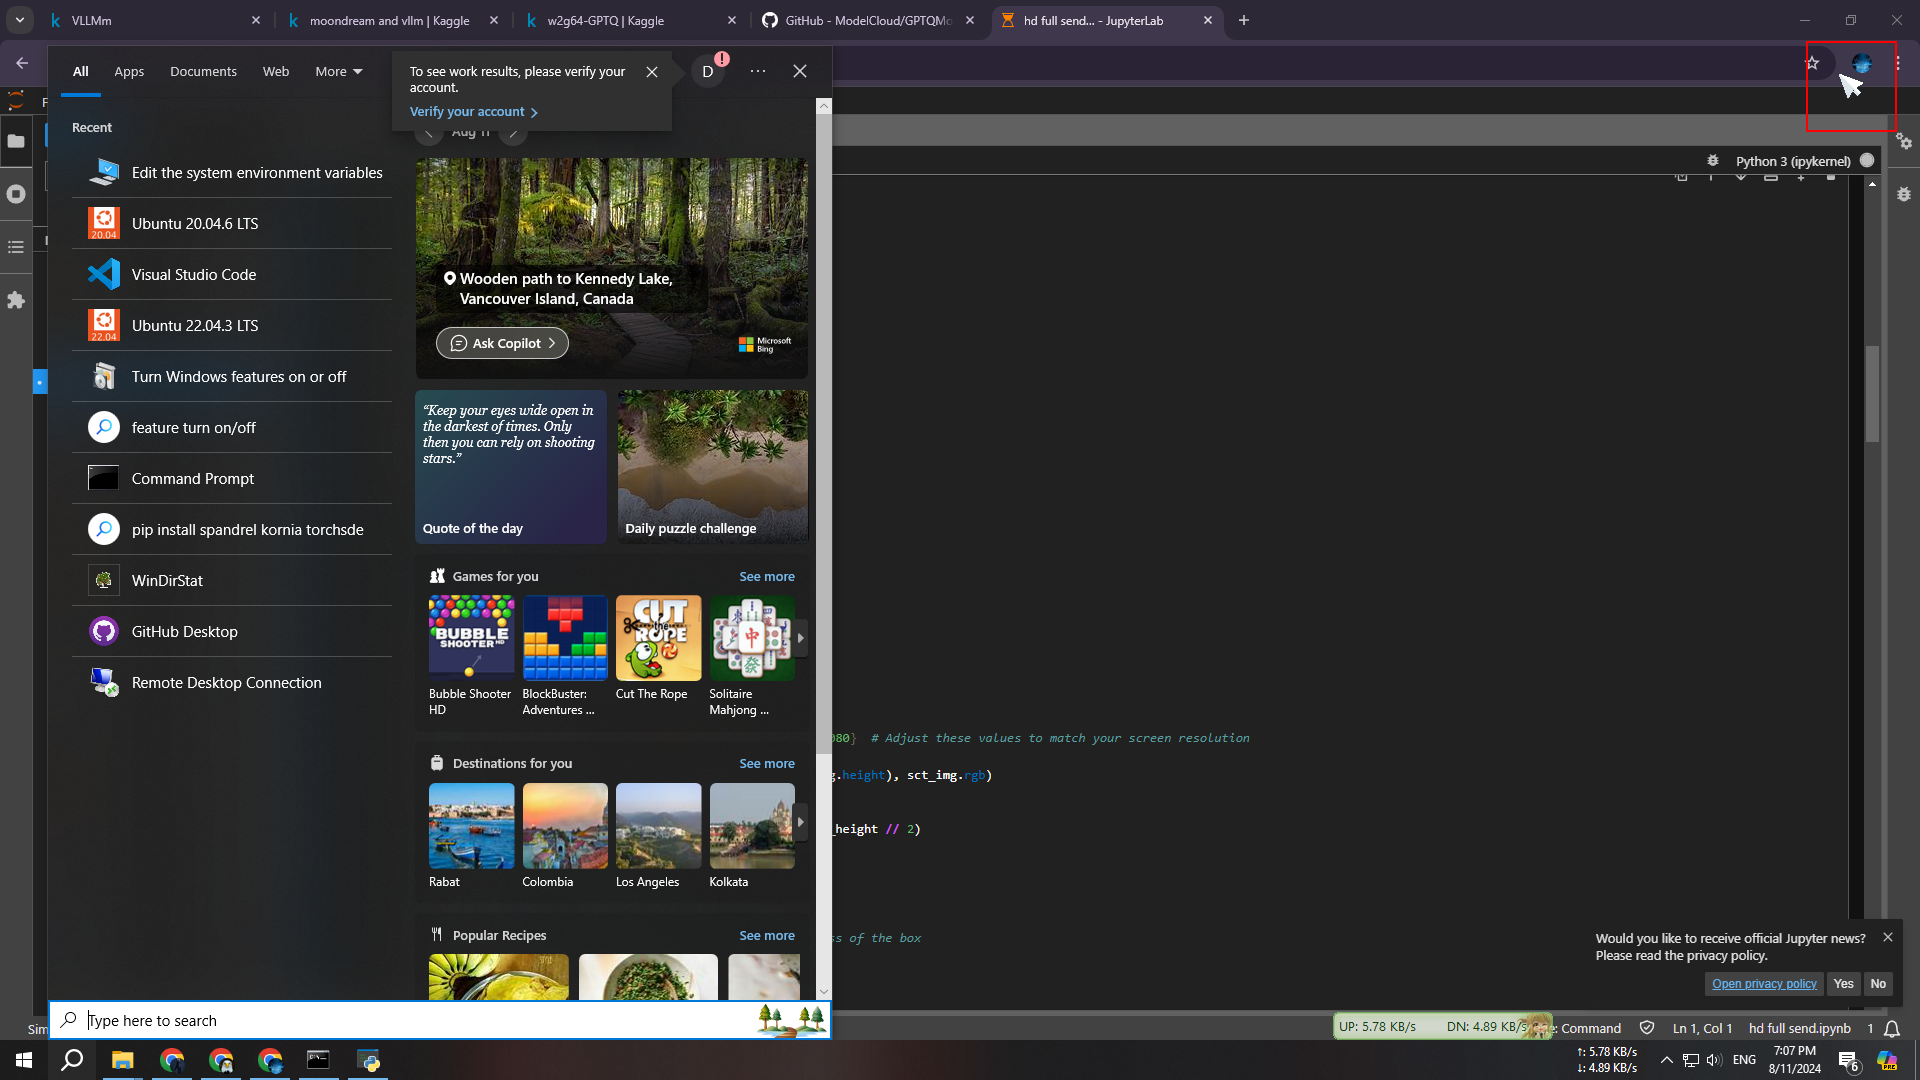

In [4]:
from mss import mss
from PIL import Image, ImageDraw
import pyautogui
import time

# Wait for 5 seconds before starting
time.sleep(5)

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 26
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

# Create an mss instance
sct = mss()

def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    position = [mouse_x, mouse_y]
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
    sct_img = sct.grab(monitor)
    screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Create a drawing context
    draw = ImageDraw.Draw(screenshot)
    
    # Draw the inner blue rectangle around the mouse icon
    box_padding = 2  # Adjust this value to change the thickness of the box
    inner_box_position = (
        icon_position[0] - box_padding,
        icon_position[1] - box_padding,
        icon_position[0] + icon_width + box_padding,
        icon_position[1] + icon_height + box_padding
    )
    # draw.rectangle(inner_box_position, outline="blue", width=box_padding)
    
    # Draw the outer rectangle 30 pixels away from the inner rectangle
    outer_padding = 30
    outer_box_position = (
        inner_box_position[0] - outer_padding,
        inner_box_position[1] - outer_padding,
        inner_box_position[2] + outer_padding,
        inner_box_position[3] + outer_padding
    )
    draw.rectangle(outer_box_position, outline="red", width=box_padding)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot,position

# Run the function
screenshot,position = capture_screen_with_mouse()
print(position)
# Display or save the result
screenshot

In [5]:
screenshot.save("cursor.png")

In [ ]:
from fastapi import FastAPI
from fastapi.responses import StreamingResponse
import io
from mss import mss
from PIL import Image, ImageDraw
import pyautogui
import time
import nest_asyncio
nest_asyncio.apply()
app = FastAPI()

# Load and resize the mouse icon once
mouse_icon = Image.open("mouse_icon.png")
n = 26
new_size = (n, n)
mouse_icon = mouse_icon.resize(new_size, Image.NEAREST)
icon_width, icon_height = mouse_icon.size

# Create an mss instance
sct = mss()


def capture_screen_with_mouse():
    s = time.time()
    
    # Get the current mouse cursor position
    mouse_x, mouse_y = pyautogui.position()
    position = [mouse_x, mouse_y]
    print(f"Mouse position: ({mouse_x}, {mouse_y})")
    
    # Capture the screen
    monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}  # Adjust these values to match your screen resolution
    sct_img = sct.grab(monitor)
    screenshot = Image.frombytes("RGB", (sct_img.width, sct_img.height), sct_img.rgb)
    
    # Calculate the position to paste the mouse icon
    icon_position = (mouse_x - icon_width // 2, mouse_y - icon_height // 2)
    
    # Create a drawing context
    draw = ImageDraw.Draw(screenshot)
    
    # Draw the inner blue rectangle around the mouse icon
    box_padding = 2  # Adjust this value to change the thickness of the box
    inner_box_position = (
        icon_position[0] - box_padding,
        icon_position[1] - box_padding,
        icon_position[0] + icon_width + box_padding,
        icon_position[1] + icon_height + box_padding
    )
    # draw.rectangle(inner_box_position, outline="blue", width=box_padding)
    
    # Draw the outer rectangle 30 pixels away from the inner rectangle
    outer_padding = 30
    outer_box_position = (
        inner_box_position[0] - outer_padding,
        inner_box_position[1] - outer_padding,
        inner_box_position[2] + outer_padding,
        inner_box_position[3] + outer_padding
    )
    draw.rectangle(outer_box_position, outline="red", width=box_padding)
    
    # Paste the mouse icon onto the screenshot
    screenshot.paste(mouse_icon, icon_position, mouse_icon)
    
    e = time.time()
    r = e - s
    print(f'total {r}')
    
    return screenshot,position


@app.get("/screenshot")
async def get_screenshot():
    screenshot, position = capture_screen_with_mouse()
    
    # Convert the screenshot to bytes
    img_byte_arr = io.BytesIO()
    screenshot.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    
    # Prepare the response headers
    headers = {
        "Content-Disposition": "attachment; filename=screenshot.png",
        "Mouse-Position-X": str(position[0]),
        "Mouse-Position-Y": str(position[1])
    }
    
    # Return the image as a streaming response
    return StreamingResponse(io.BytesIO(img_byte_arr), media_type="image/png", headers=headers)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [4572]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:55911 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:55911 - "GET /favicon.ico HTTP/1.1" 404 Not Found
Mouse position: (546, 498)
total 0.05725216865539551
INFO:     127.0.0.1:55915 - "GET /screenshot HTTP/1.1" 200 OK


In [14]:
import pyautogui
import time

# Add a slight delay to give you time to switch to the application where you want to type the text
time.sleep(6)

# Get the current position of the cursor
position = pyautogui.position()
print(f"Mouse Cursor position: {position}")

# Type the text "i love u dubu"
pyautogui.typewrite("i love u dubu")


Mouse Cursor position: Point(x=1691, y=293)
